In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
''

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Starting analysis by only considering the numerical data initiallly instead of dates 

In [4]:
df_copy=df

In [5]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In this it is clear that the classes column has inconsistancy in the entries lets normalize it by providing 0,1

In [7]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [10]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

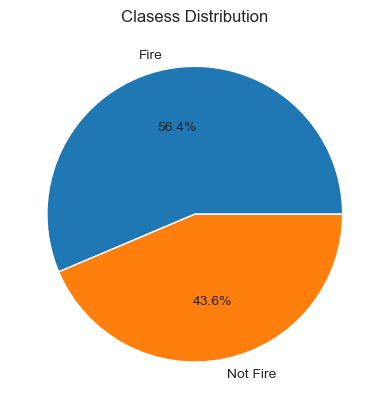

In [18]:
labels=['Fire','Not Fire']
plt.title('Clasess Distribution')
plt.pie(df_copy['Classes'].value_counts(),labels=labels
        ,autopct='%1.1f%%')
plt.show()

In [11]:
df_copy.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


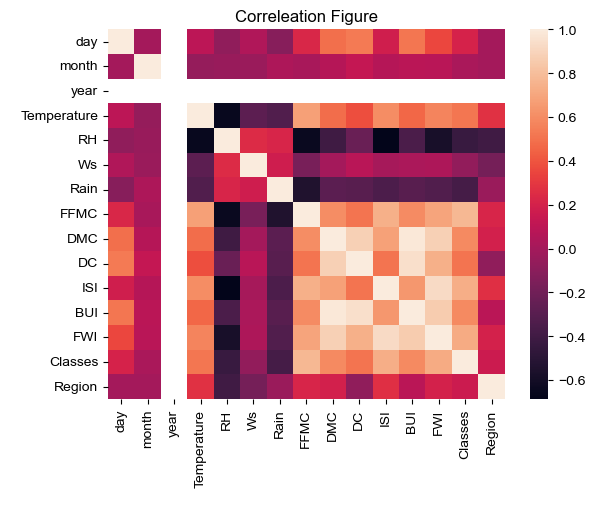

In [12]:

plt.title('Correleation Figure')
sns.heatmap(df_copy.corr())
sns.set_style('darkgrid')


,DMC,DC
DMC,1.000000,0.875925
DC,0.875925,1.000000


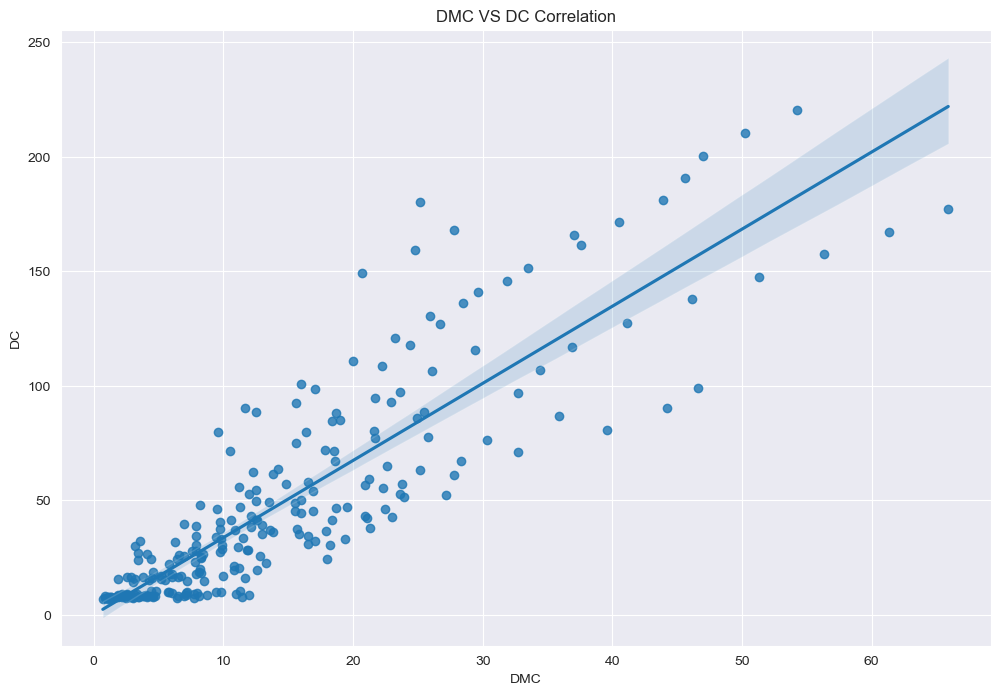

In [22]:
plt.figure(figsize=(12,8))
plt.title('DMC VS DC Correlation')
sns.regplot(x='DMC',y='DC',data=df_copy)
df_copy[['DMC','DC']].corr()


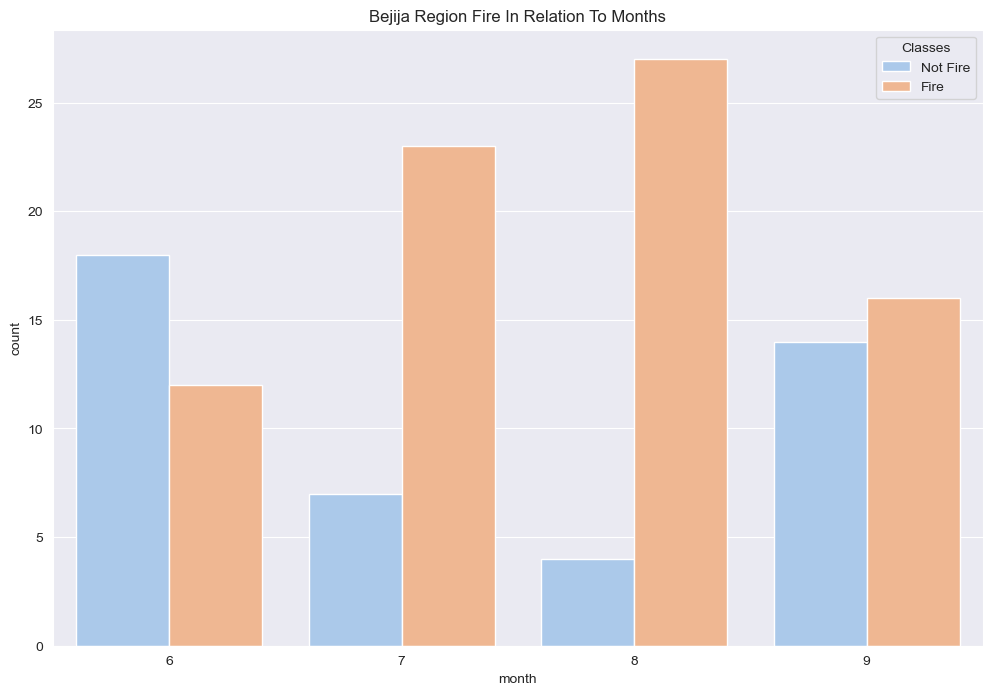

In [25]:
region_bejaija=df_copy.loc[df_copy['Region']==1]
plt.figure(figsize=(12,8))
plt.title('Bejija Region Fire In Relation To Months')
sns.countplot(x='month',data=region_bejaija,hue='Classes')
plt.legend(labels=['Not Fire','Fire'],title='Classes')
sns.set_palette('pastel')


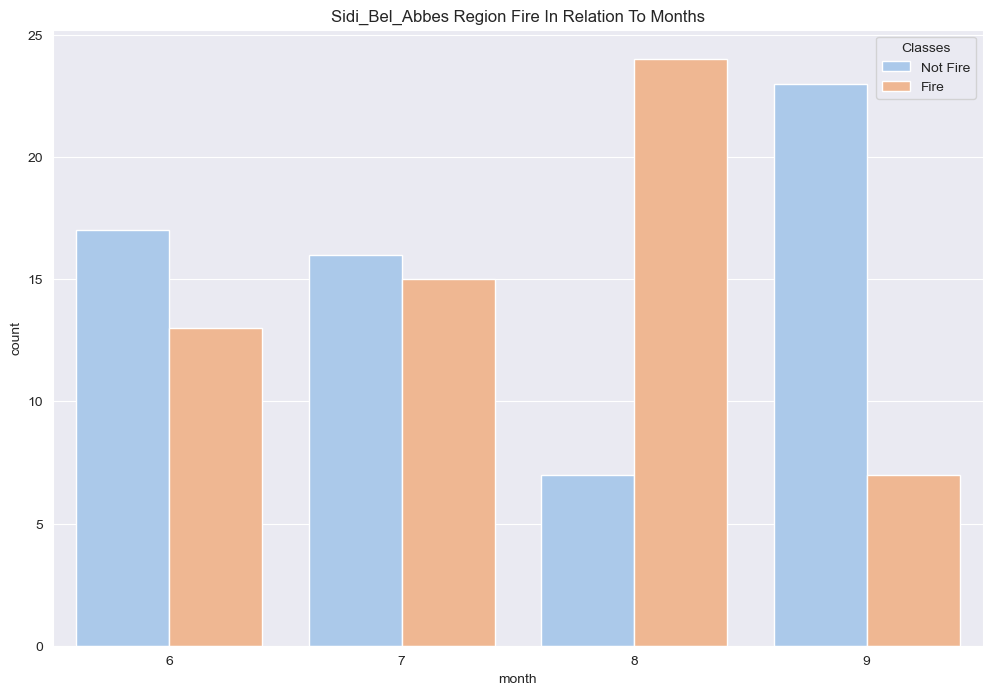

In [26]:
region_Sidi_Bel_Abbes =df_copy.loc[df_copy['Region']==0]
plt.figure(figsize=(12,8))
plt.title('Sidi_Bel_Abbes Region Fire In Relation To Months')
sns.countplot(x='month',data=region_Sidi_Bel_Abbes,hue='Classes')
plt.legend(labels=['Not Fire','Fire'],title='Classes')
sns.set_palette('pastel')

From this it is clear that the momth of august and september are most caotic fire causing month which is becouse of the higher temprature . This is the case of both regions 